### 1. 분석스토리

이제 막 병아리를 키우고 있는 김 대표는 문득 병아리의 성장 속도에 영향을 미치는 인자들이 궁금해졌습니다. 병아리의 성장속도가 빠르면 보다 많은 매출을 올릴 수 있기 때문입니다. 아마도 유전적인 요소도 중요할 것이고, 사료를 얼마만큼 먹는지도 중요할 것입니다. 그렇다면 데이터를 통해 한 번 알아보도록 하겠습니다.

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
w = pd.read_csv("./rawdata/ch5-1.csv")
w.head()

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13


In [4]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
w_n = w.iloc[:, 1:5]
w_n.head()

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


In [6]:
w_cor = w_n.corr(method='pearson')
w_cor

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


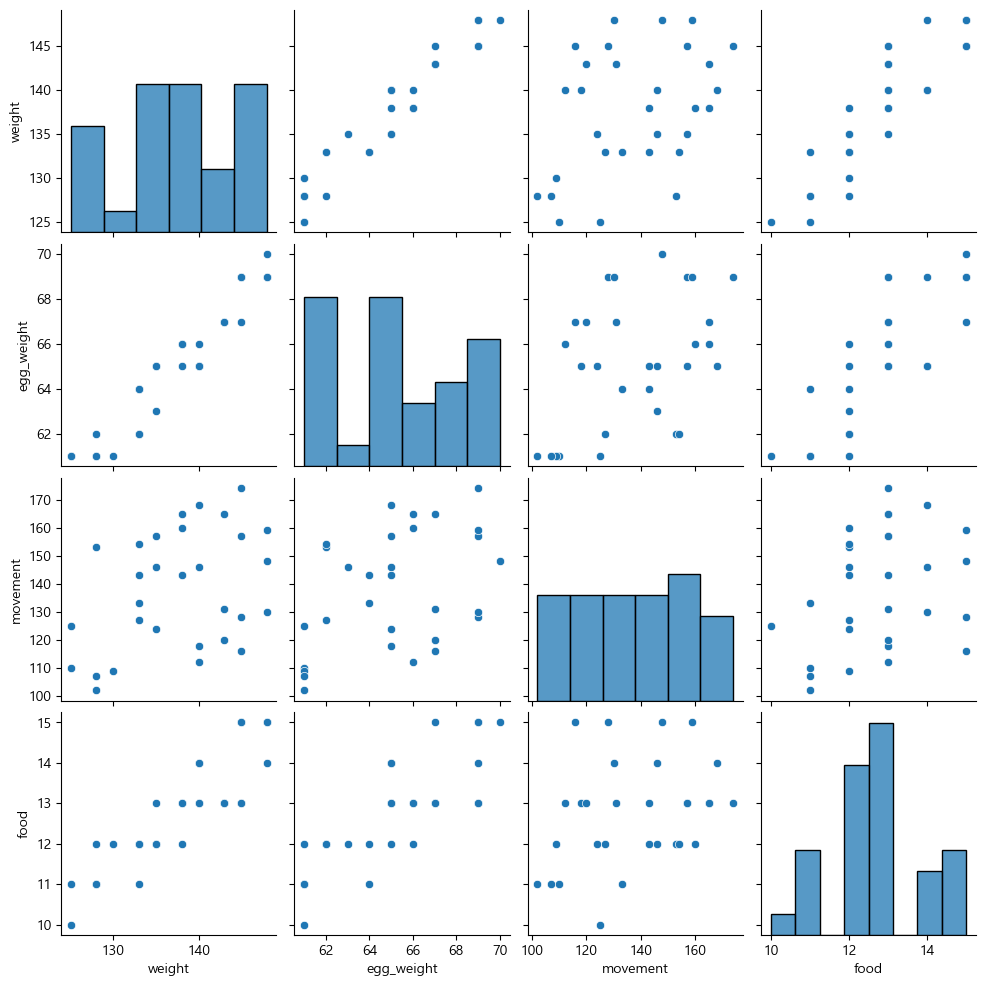

In [7]:
sns.pairplot(w_n)

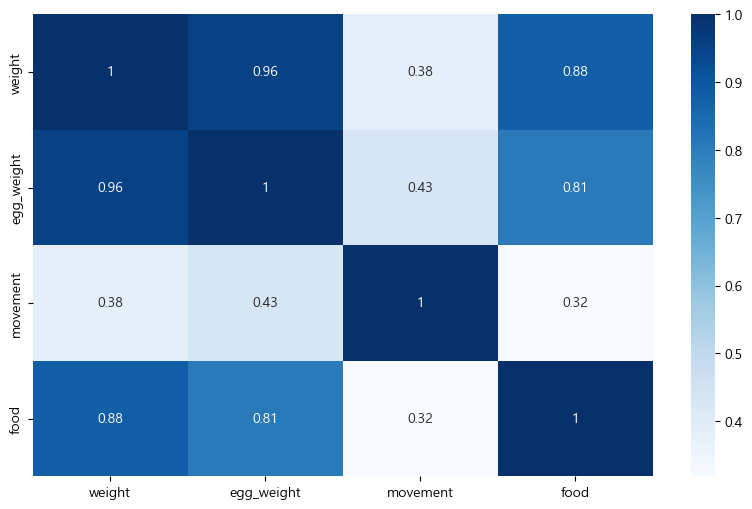

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(w_cor, annot=True, cmap='Blues')
plt.show()

### 2. 분석 스토리 

상관분석을 통해 병아리의 몸무게에 영향을 미치는 인자들을 찾을 수 있었고, 그중에서도 병아리가 태어난 달걀인 종란 무게가 가장 큰 양의 상관관계를 갖고 있음을 확인할 수 있었습니다. 그렇다면 종란 무게로 병아리 몸무게를 예측하는 것이 가능한지 한 번 알아보겠습니다.

In [9]:
import statsmodels.formula.api as smf 

In [10]:
model_lm = smf.ols(formula='weight ~ egg_weight', data=w_n)

In [11]:
result_lm = model_lm.fit()

In [13]:
result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.32e-16
Time:                        23:17:32   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

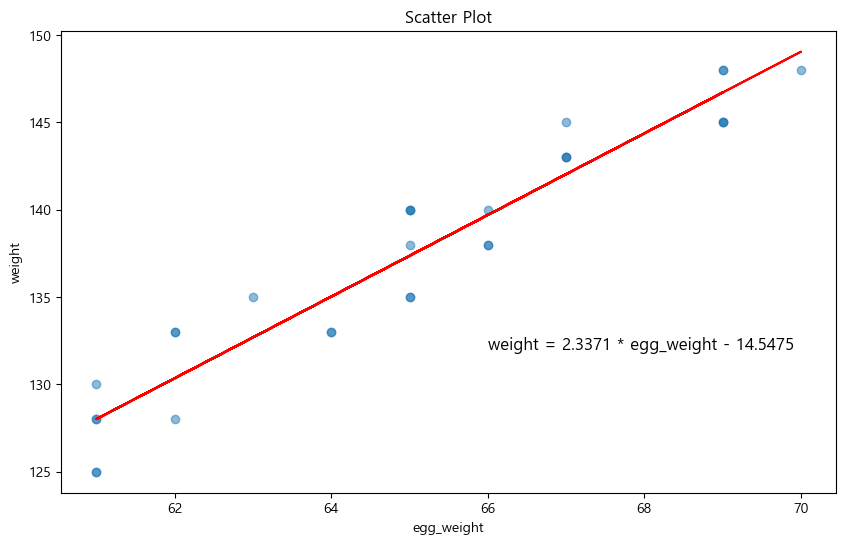

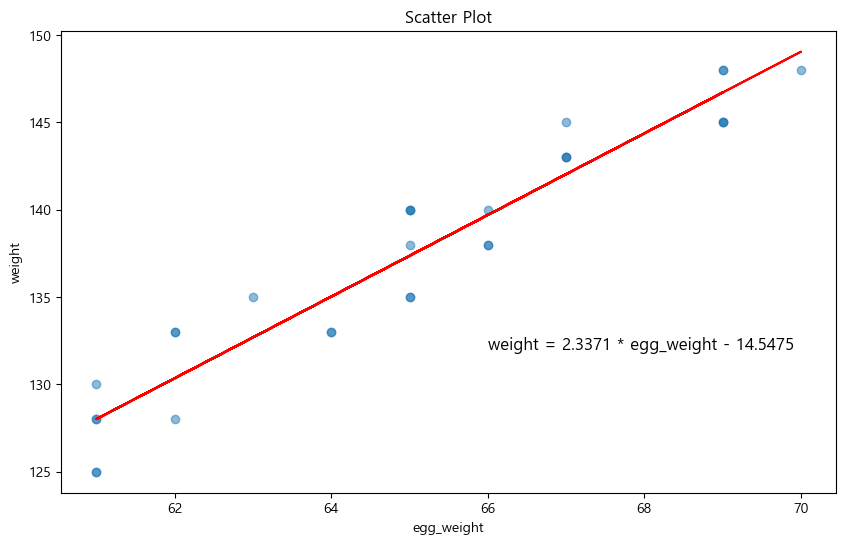

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(w.egg_weight, w.weight, alpha=.5)
plt.plot(w.egg_weight, w.egg_weight * 2.3371 - 14.5475, color='red')
plt.text(66, 132, 'weight = 2.3371 * egg_weight - 14.5475', fontsize=12)
plt.title("Scatter Plot")
plt.xlabel("egg_weight")
plt.ylabel("weight")
plt.show()

In [16]:
# 잔차 확인
result_lm.resid.head()

0    2.633714
1   -2.354880
2    2.633714
3   -2.366286
4   -1.714829
dtype: float64

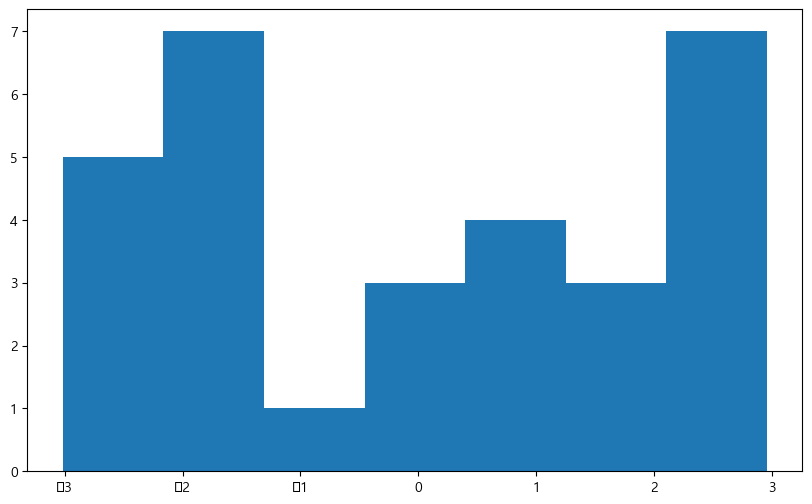

In [20]:
# 잔차 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(result_lm.resid, bins=7)
plt.show()

In [21]:
model_mlm = smf.ols(formula='weight ~ egg_weight + food + movement', data = w_n)
result_mlm = model_mlm.fit()
result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           8.46e-17
Time:                        23:25:25   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model_mlm2 = smf.ols(formula = 'weight ~ egg_weight + food', data=w_n)
result_mlm2 = model_mlm2.fit()
result_mlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           5.44e-18
Time:                        23:29:25   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀모델 변수명 속성
model_mlm2.exog_names

['Intercept', 'egg_weight', 'food']

In [26]:
# 첫 번째 변수 - egg_weight vif 계산
vif1 = variance_inflation_factor(model_mlm2.exog, 1)

In [27]:
vif2 = variance_inflation_factor(model_mlm2.exog, 2)

In [28]:
print(vif1, vif2)

2.882684511307579 2.8826845113075756


c:\Users\jinyoung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


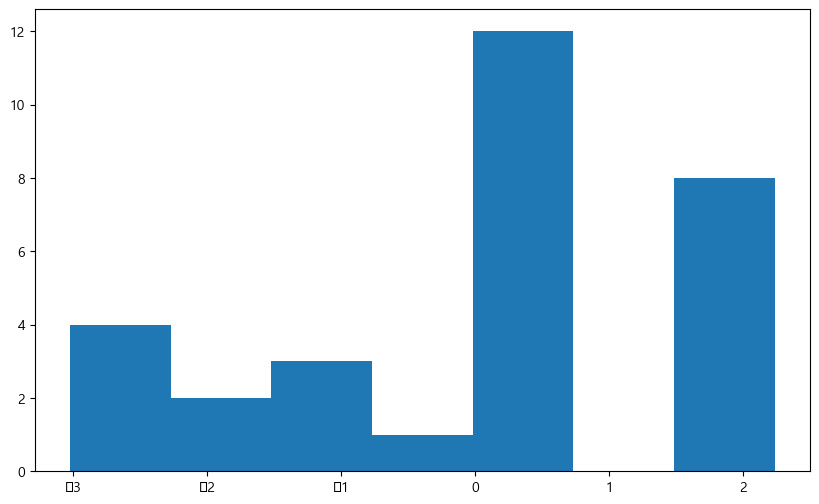

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(result_mlm2.resid, bins=7)
plt.show()

### 3. 분석 스토리 (비선형 회귀분석)

김대표는 다중 회귀분석을 이용해 종란 무게와 하루 평균 사료 섭취량 데이터로 병아리 무게를 매우 높은 정확도로 예측할 수 있는 회귀모델을 개발할 수 있었습니다. 하지만 이 수식은 단지 부화한지 1주일된 병아리의 몸무게를 예측하는 데 외에는 사용할 수 없었습니다.

김 대표는 문득 단지 1주일된 병아리의 몸무게가 아닌 병아리가 닭이 될 때까지 성장기간에 따른 몸무게 변화가 궁금해졌습니다. 그래서 병아리 한 마리를 지정해 부화한 첫날부터 70일까지의 몸무게를 기록했습니다. 성장기간에 따른 병아리의 몸무게는 과연 어떻게 변화했을까요?

In [30]:
w2 = pd.read_csv("./rawdata/ch5-2.csv")

In [31]:
w2.head()

,day,weight
0,1,43
1,2,55
2,3,69
3,4,86
4,5,104


In [32]:
w2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   day     70 non-null     int64
 1   weight  70 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


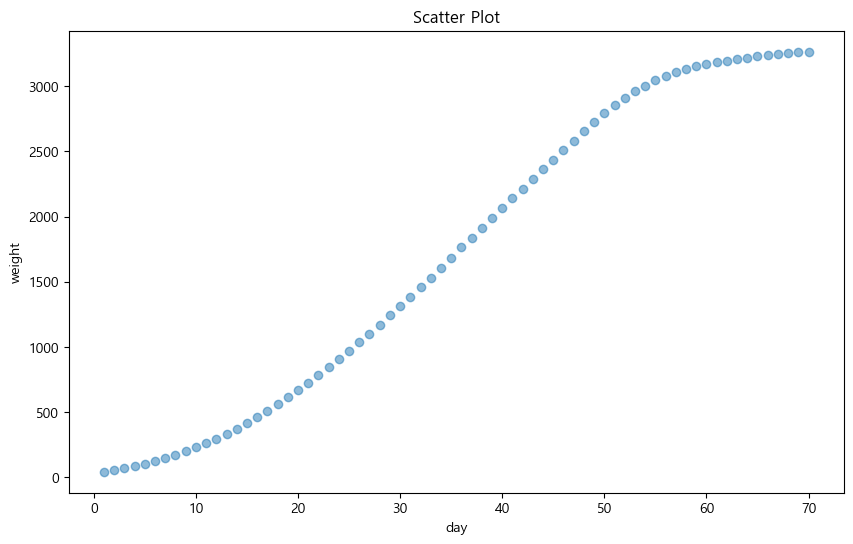

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(w2.day, w2.weight, alpha=.5)
plt.title("Scatter Plot")
plt.xlabel("day")
plt.ylabel("weight")
plt.show()

In [34]:
model_lm2 = smf.ols(formula='weight ~ day', data=w2)
result_lm2 = model_lm2.fit()
result_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3189.
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           7.22e-59
Time:                        23:50:51   Log-Likelihood:                -457.86
No. Observations:                  70   AIC:                             919.7
Df Residuals:                      68   BIC:                             924.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -295.8671     41.102     -7.198      0.000    -377.885    -213.850
day           56.8216      1.006     56.470      0.000      54.814      58.830
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.079
Skew:                          -0.133   Prob(JB):                        0.354
Kurtosis:                       2.199   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

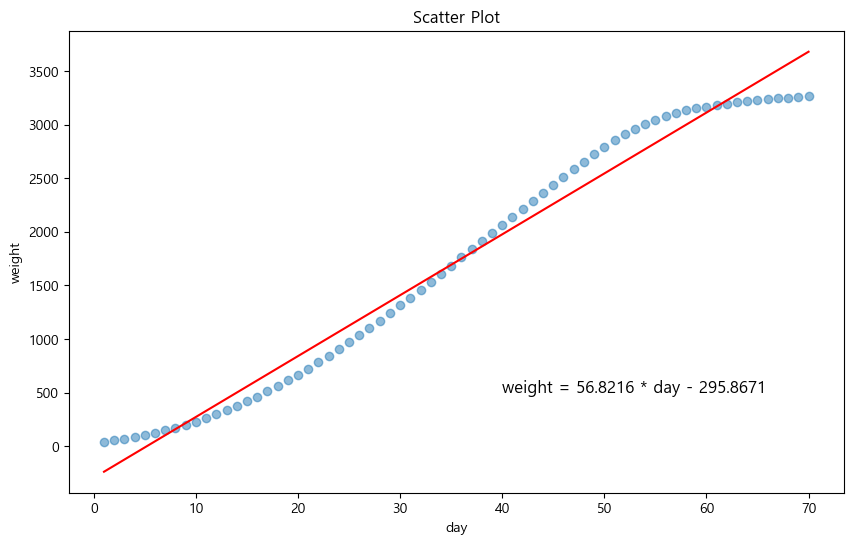

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(w2.day, w2.weight, alpha=.5)
plt.plot(w2.day, w2.day * 56.8216 - 295.8671, color='red')
plt.text(40, 500, 'weight = 56.8216 * day - 295.8671', fontsize=12)
plt.title("Scatter Plot")
plt.xlabel("day")
plt.ylabel("weight")
plt.show()

In [36]:
model_nlm = smf.ols(formula='weight ~ I(day**3) + I(day**2) + day', data=w2)
result_nlm = model_nlm.fit()
result_nlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.407e+04
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          7.13e-109
Time:                        00:00:15   Log-Likelihood:                -327.17
No. Observations:                  70   AIC:                             662.3
Df Residuals:                      66   BIC:                             671.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.0141     13.476      8.683      0.000      90.108     143.920
I(day ** 3)    -0.0253      0.000    -51.312      0.000      -0.026      -0.024
I(day ** 2)     2.6241      0.053     49.314      0.000       2.518       2.730
day           -15.2978      1.632     -9.373      0.000     -18.557     -12.039
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.680
Skew:                           0.103   Prob(JB):                        0.262
Kurtosis:                       2.064   Cond. No.                     5.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

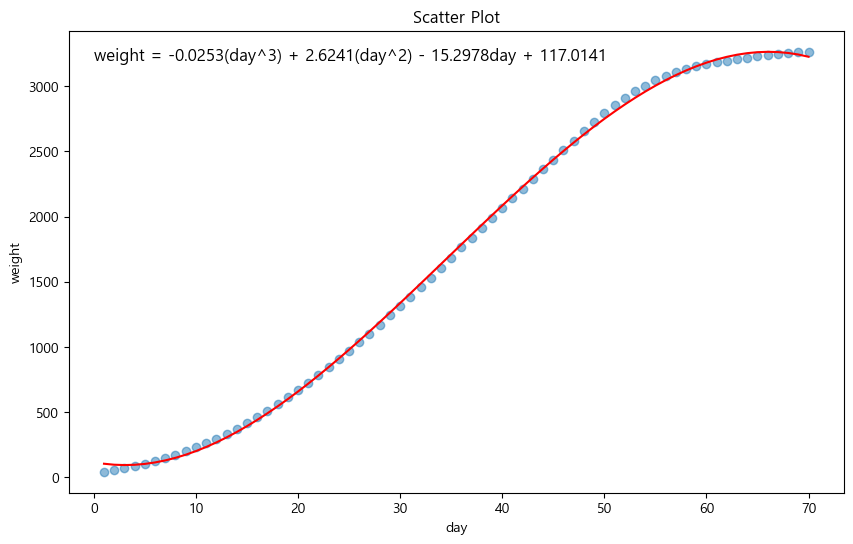

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(w2.day, w2.weight, alpha=.5)
plt.plot(w2.day, (w2.day ** 3) * (-0.0253) + (w2.day ** 2) * 2.6241 + w2.day * (-15.2978) + 117.0141, color='red')
plt.text(0, 3200, 'weight = -0.0253(day^3) + 2.6241(day^2) - 15.2978day + 117.0141', fontsize=12)
plt.title("Scatter Plot")
plt.xlabel("day")
plt.ylabel("weight")
plt.show()